findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

{'migration_type': '1', 'rate': '  2', 'queueing_delay': ' 0.00655173', 'adjust_time': None, 'solver_time': None, 'tot_time': None}
{'migration_type': '1', 'rate': '  3', 'queueing_delay': ' 0.0237691', 'adjust_time': None, 'solver_time': None, 'tot_time': None}
{'migration_type': '1', 'rate': '  4', 'queueing_delay': ' 0.0538721', 'adjust_time': None, 'solver_time': None, 'tot_time': None}
{'migration_type': '1', 'rate': '  5', 'queueing_delay': ' 0.373753', 'adjust_time': None, 'solver_time': None, 'tot_time': None}
{'migration_type': '1', 'rate': '  6', 'queueing_delay': ' 0.794568', 'adjust_time': None, 'solver_time': None, 'tot_time': None}
{'migration_type': '1', 'rate': '  7', 'queueing_delay': ' 1.3493571281433105', 'adjust_time': None, 'solver_time': None, 'tot_time': None}
{'migration_type': '2', 'rate': '  8', 'queueing_delay': ' 0.0170788', 'adjust_time': None, 'solver_time': None, 'tot_time': None}
{'migration_type': '2', 'rate': ' 12', 'queueing_delay': ' 0.1848', 'adjust

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

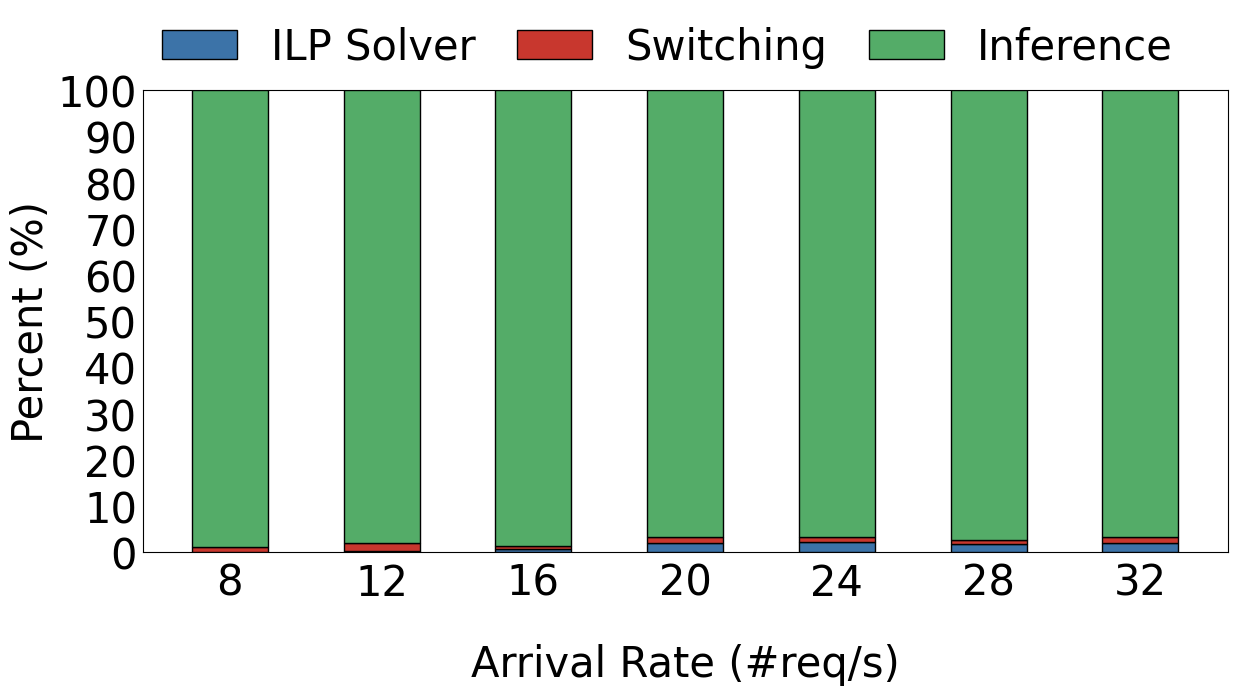

In [5]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv

# constants
num_size = 7
num_bars = 1
num_subfigs = 1

ilp_time_list = []
switch_time_list = []
tot_time_list = []

file_path = "./fig11a.csv"
with open(file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        print(row)
        migration_type = int(row["migration_type"]) - 1
        if migration_type == 2:
            ilp_time_list.append(float(row["solver_time"]))
            switch_time_list.append(float(row["adjust_time"]))
            tot_time_list.append(float(row["tot_time"]))

ilp_time_list = np.array(ilp_time_list)
switch_time_list = np.array(switch_time_list)
tot_time_list = np.array(tot_time_list)

ilp_ratio = ilp_time_list / tot_time_list * 100
switch_ratio = switch_time_list / tot_time_list * 100
inference_ratio = (tot_time_list - ilp_time_list - switch_time_list) / tot_time_list * 100

# Set font and figure size
font_size = 30
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)

fig_size = (14, 6)
fig, axes = plt.subplots(figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = True
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# settings
colors = {0: 'grey', 1: '#3c73a8', 2: '#c8372e', 3: '#54ac68', 4: '#dbac50'}
labels = {0: 'ILP Solver', 1: 'Switching', 2: 'Inference'}

width = 0.1
indexes = [[0.2*i+0.1+width*j for i in range(num_size)] for j in range(num_bars)]

# x-axis setting
x_label = 'Arrival Rate (#req/s)'
x_ticks = []
for i in range(num_size):
    x_ticks.append(sum(indexes[j][i] for j in range(num_bars))/num_bars)
x_ticklabels = [i for i in range(8, 36, 4)]

# y-axis setting
y_label = 'Percent (%)'
y_ticks = np.arange(0, 110, step=10)

axes.set_xlabel(x_label, labelpad=28)
axes.set_xticks(x_ticks)
axes.set_xticklabels(x_ticklabels)
axes.get_xaxis().set_tick_params(direction='in', pad=7)
axes.get_xaxis().set_tick_params(which='minor', direction='in')

axes.set_ylabel(y_label)
axes.set_ylim(bottom=0, top=100)
axes.set_yticks(y_ticks)
axes.yaxis.set_ticks_position('left')
axes.tick_params(bottom=False, top=False, left=False, right=False)
axes.minorticks_off()
axes.get_yaxis().set_tick_params(direction='in', pad=4)
axes.get_yaxis().set_tick_params(which='minor', direction='in')

# Plot bars
bars = [[] for i in range(3)]
bars[0] = axes.bar(indexes[0], ilp_ratio, width, label=labels[0], edgecolor='black', zorder=3, color = colors[1])
bars[1] = axes.bar(indexes[0], switch_ratio, width, label=labels[1], edgecolor='black', zorder=3, color = colors[2], bottom=ilp_ratio)
bars[2] = axes.bar(indexes[0], inference_ratio, width, label=labels[2], edgecolor='black', zorder=3, color = colors[3], bottom=ilp_ratio+switch_ratio)


fig.legend(handles=[bars[0], bars[1], bars[2]], handlelength=1.8, 
           ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.05), frameon=False, prop={'size':font_size}, columnspacing = 1)

file_path = './figure13.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)